# Аналитика в авиакомпании

Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали. 

Мы получили 2 файла, в которых содержатся результаты запросов из предыдущих заданий.
Для анализа нам нужно:
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

## Изучение данных из файлов и предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загрузим данные из исходных файлов и изучим их.

In [2]:
df_1 = pd.read_csv('/datasets/query_1.csv')
df_2 = pd.read_csv('/datasets/query_3.csv')

In [3]:
display(df_1)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
df_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


В первой таблице содержится информация о:
    - model — модели самолета;
    - flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года.

Пропусков нет, тип данных правильный.

In [6]:
display(df_2)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
df_2.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Во второй таблице содержится информация о:
    - city — городах;
    - average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года.
    
Пропусков нет, тип данных правильный.
Но для столбца 'average_flights' округлим значения до 2 знаков после запятой для удобства.
Среднее количество рейсов 5,5, при этом медианное значение 3, что может свидетельствовать о том, что данные распределены неравномерно и в выборке есть очень большие значения.

In [9]:
df_2['average_flights'] = round(df_2['average_flights'], 2)

In [10]:
display(df_2)

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45
...,...,...
96,Чита,1.58
97,Элиста,4.87
98,Южно-Сахалинск,4.29
99,Якутск,2.74


### Вывод

На данном этапе были:
- изучены данные из файлов;
- проверены типы данных на корректность;
- данные о среднем количестве рейсов были округлены до 2 знаков после запятой для удобства;
- разница между средним (5,5) и медианным (3) значениями во второй таблице говорит о том, что выборка неравномерна и в ней встречаются большие значения. На следующем шаге проверим, кто выбивается в лидеры.

## Исследовательский анализ данных

- Найдём топ-10 городов по количеству рейсов.

In [11]:
top_10 = df_2.sort_values(by='average_flights', ascending=False).head(10).reset_index(drop=True)
top_10

,city,average_flights
0,Москва,129.77
1,Санкт-Петербург,31.16
2,Новосибирск,17.32
3,Красноярск,11.58
4,Екатеринбург,11.32
5,Ростов-на-Дону,10.19
6,Пермь,10.13
7,Брянск,10.00
8,Сочи,9.61
9,Ульяновск,9.58


- Построим график, показывающий количество рейсов в зависимости от модели самолёта.

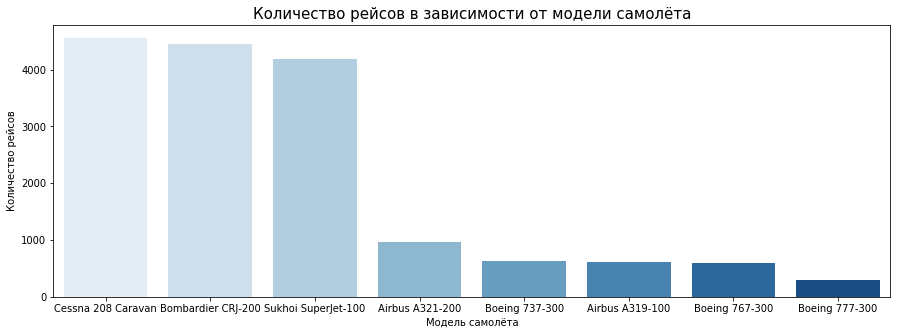

In [12]:
plt.figure(figsize=(15,5))
plt.title('Количество рейсов в зависимости от модели самолёта',fontsize=15)
sns.barplot(data=df_1.sort_values(by='flights_amount', ascending=False), x='model', y='flights_amount', palette='Blues')
plt.xlabel('Модель самолёта')
plt.ylabel('Количество рейсов');

Как видим из графика, лидеры по количеству рейсов самолёты Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100.
Это объясняется тем, что это небольшие самолёты и, скорее всего, они совершают полёты в ближайшие аэропорты, соответственно, количество рейсов у таких самолётов выше, чем у тех, которые больше по размерам и летают дальше (и логично дольше).
Меньше всего рейсов у Boeing 777-300, который самой большой самолёт в выборке и который летает дальше всего.

- Построим график, показывающий количество рейсов в зависимости города.

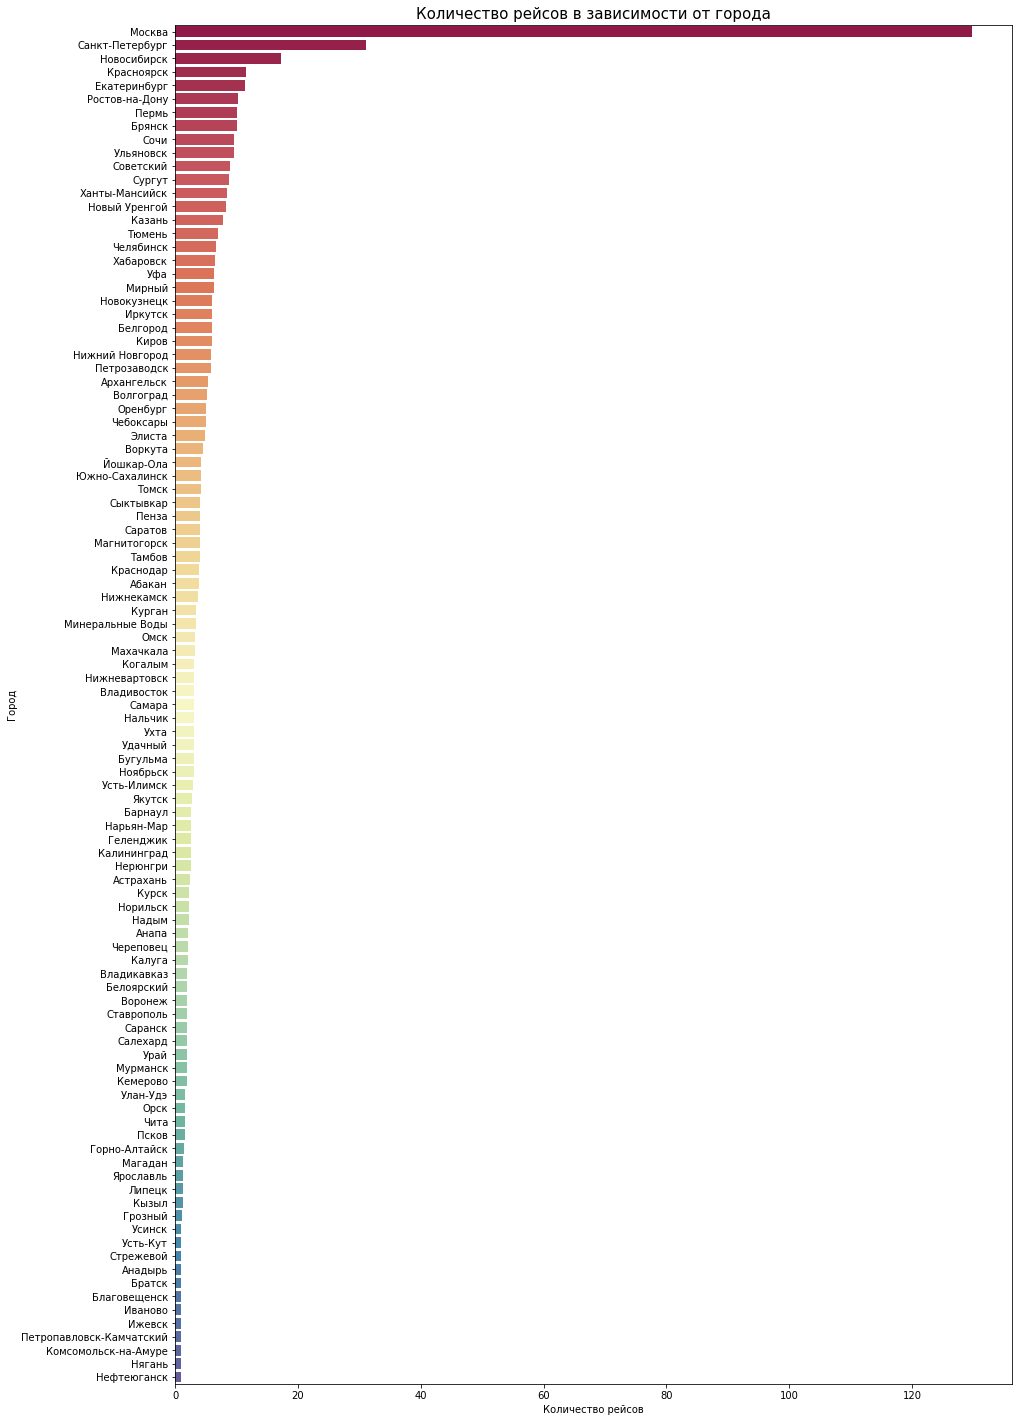

In [13]:
plt.figure(figsize=(15,25))
plt.title('Количество рейсов в зависимости от города',fontsize=15)
sns.barplot(data=df_2.sort_values(by='average_flights', ascending=False), x='average_flights', y='city', palette='Spectral')
plt.xlabel('Количество рейсов')
plt.ylabel('Город');

Как видим из графика, явный лидер по количеству рейсов среди городов России - Москва. Это объясняется тем, что это центр всей жизни в стране - политический, деловой, общественный и т.п., а также это самый крупный транспортный узел, позволяющий соединять города, у которых нет прямого сообщения друг с другом.

- Построим график, показывающий количество рейсов для топ-10 городов.

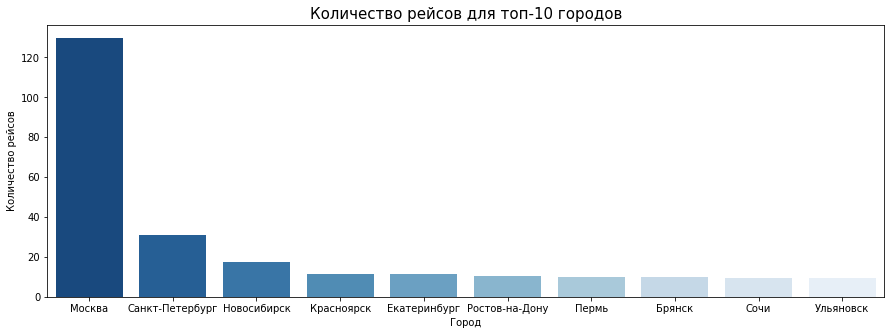

In [14]:
plt.figure(figsize=(15,5))
plt.title('Количество рейсов для топ-10 городов',fontsize=15)
sns.barplot(data=top_10, x='city', y='average_flights', palette='Blues_r')
plt.xlabel('Город')
plt.ylabel('Количество рейсов');

В топ-10 городов по количеству рейсов входят столица и северная столица (это ожидаемо), а также крупные города России, которые являются административными центрами областей и краёв. Выбивается только Сочи, но это самый популярный курорт в стране (центр отдыха).
Из данной выборки видно, что в Москве количество рейсов в 4 раза превышает Санкт-Петербург и в 10 раз превышает остальные города России, что говорит о сильном развитии столицы и слабом развитии регионов. Плюс в Москве 4 аэропорта, а в других городах - по одному.
Предлагаю проверить, количество рейсов в Москве больше или меньше по сравнению с 9 городами вместе взятыми.

In [15]:
top_10['average_flights'].head(1).sum() > top_10['average_flights'].tail(9).sum()

True

Действительно, количество рейсов в Москве больше, чем количество в остальных 9 городах вместе взятых.

### Вывод

В ходе данного шага был проведён исследовательский анализ и сделаны следующие выводы:
- лидеры по количеству рейсов самолёты Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Это объясняется тем, что маленькие самолёты чаще совершают рейсы из-за небольших расстояний между аэропортами;
- меньше всего рейсов у самого крупного самолёта в выборке - Boeing 777-300, т.к. он летает по расстоянию дальше всего.
- безговорочный лидер по количеству рейсов среди городов России - Москва, т.к. это столица и центр всей жизни в стране, а также это самый крупный транспортный узел страны;
- в топ-10 городов по количеству рейсов вошли помимо Москвы, ещё и крупные города России, которые являются административными центрами. Но по сравнению с Москвой количество рейсов даже в этой выборке в десять раз меньше, чем в столице (кроме Санкт-Петербурга и Новосибирска);
- количество рейсов в Москве больше, чем суммарное количество в остальных 9 городах из топ-10 вместе взятых.
Вывод простой - нужно развивать авиаперевозки в обход Москвы, чтобы было больше прямых рейсов между крупными городами страны.

## Общий вывод

В ходе данного исследования были сделаны следующие шаги и выводы:

1) предварительный анализ показал, что данные корректны и нет пропусков. Но для удобства данные о среднем количестве рейсов были округлены;
2) в ходе исследовательского анализа данных были сделаны следующие выводы:
- лидеры по количеству рейсов самолёты Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Это небольшие самолёты, которые совершают больше рейсов, скорее всего, между близлежащими городами;
- меньше всего рейсов у самого крупного самолёта в выборке - Boeing 777-300, т.к. он летает по расстоянию дальше всего.
- выявлен лидер по количеству рейсов среди городов России - Москва, т.к. это столица и всё движение проходит через неё;
- в топ-10 городов по количеству рейсов вошли крупные города России - в основном, это центры областей и краёв. Но по сравнению с Москвой остальные города очень сильно отстают - количество рейсов в десять раз меньше, чем в столице (кроме Санкт-Петербурга и Новосибирска);
- также было выявлено, что количество рейсов в Москве больше, чем суммарное количество в остальных 9 городах из топ-10 вместе взятых.

Исходя из полученных данных, можно сделать вывод, что есть необходимость в развитии полётов между регионами, без транзитных рейсов через Москву.